In [5]:
import numpy as np
import scipy
from scipy import integrate
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [42]:
#establish a time range to compute the solution
start = 0
stop = 32
delta_t = 0.5

#determine number of points in time array
t_pts = int(1 + ((stop - start) / delta_t))

a_t = np.linspace(start, stop, t_pts)

#initial values
init = [np.sqrt(3), 1]

#set up function
def van_der_Pol(Y, t):
    dydt = [Y[1], -e*(Y[0]**2 - 1)*Y[1]-Y[0]]
    return dydt

########################################################

avg_step_45 = []
tol_step_45 = []
i=4

for i in range(4, 11):

    e = 1
    
    abserr = 10**(-(i-1))  #to minick ode15 
    relerr = 10**(-i)  #to minick ode15

    #matrix returned from solvr, initial conditions, time range.
    asol, infodict = integrate.odeint(van_der_Pol, init, a_t, rtol=relerr, atol=abserr, full_output = True)
    y1b = asol[:,0:1]
    y2b = asol[:,1:2]
    
    #calculate average step size
    hu = infodict['hu']
    step_avg = np.mean(hu)
    
    #append average step size
    tol_step_45.append(relerr)
    avg_step_45.append(step_avg)
    
#calculate polyfit line
slope, intercept = np.polyfit(np.log(tol_step_45),np.log(avg_step_45),1)
A8=[]
A8.append(slope)
np.savetxt('A8.dat', A8)

In [45]:
A8

[0.09862381417557811]

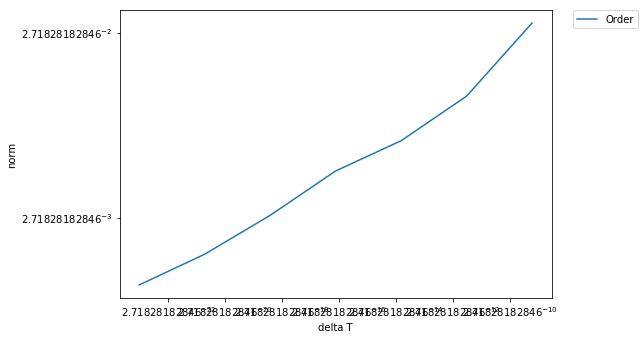

In [44]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

#ax.plot(norm_list, delta_t_list, label = 'Order')
ax.plot(tol_step_45, avg_step_45, label = 'Order')

#title axis
ax.set_xlabel('delta T')
ax.set_ylabel('norm')
ax.set_title('')
ax.set_yscale('log', basey = np.e)
ax.set_xscale('log', basex = np.e)

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()